In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# fs = [
#     'graphcombo_compare_noedge/NO_GNN_Decagon_feats_',
#     'graphcombo_compare_Decagon/GEO_GCN_Decagon_feats_',
#     'graphcombo_compare_GNBR/GEO_GCN_GNBR_feats_',
#     'GEO_GCN_GNBR/GEO_GCN_GNBR_feats_',
#     'graphcombo_compare_naive/GEO_GCN_Decagon_GNBR_feats_',
#     'GEO_GCN_Both/GEO_GCN_Decagon_GNBR_feats_',
#     'graphcombo_compare_hetero/ADA_GCN_GNBR_feats_heterogeneous'
# ]
fs = [
    'GEO_GCN_GNBR/GEO_GCN_GNBR_feats_',
    'GEO_GCN_Both/GEO_GCN_Decagon_GNBR_feats_',
    'ADA_A/ADA_A_GNBR_feats_heterogeneous',
    'ADA_B/ADA_B_GNBR_feats_heterogeneous',
    'ADA_C/ADA_C_GNBR_feats_heterogeneous',
    'ADA_D/ADA_D_GNBR_feats_heterogeneous'
]

In [36]:
num = len(fs)
width = 0.1 * num
x = np.arange(5)
# labels = ['no_edge', 'GCN_Decagon', 'GCN_GNBR', 'GNBR2', 'GCN_Naive', 'GCN_Naive2', 'A']
labels = ['GEO_GCN_GNBR', 'GEO_GCN_Concat', 'A', 'B', 'C', 'D']

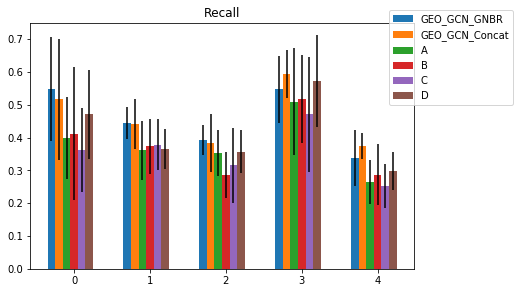

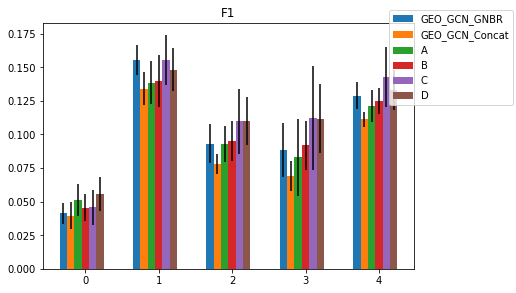

In [37]:
fig, ax = plt.subplots()
fig2, ax2 = plt.subplots()
for idx, f in enumerate(fs):
    data = np.load(f'../tensorboard_runs/{f}/results.npy', allow_pickle = True).item()
    f1_means, f1_errs, recall_means, recall_errs = [], [], [], []
    for i in range(5):
        results_dicts = data[i]
        curr_f1s = [d['f1'] for d in results_dicts]
        curr_recalls = [d['recall'] for d in results_dicts]
        f1_means.append(np.mean(curr_f1s))
        f1_errs.append(np.std(curr_f1s))
        recall_means.append(np.mean(curr_recalls))
        recall_errs.append(np.std(curr_recalls))
    rect = ax.bar(x - num / 2 * width/num + idx * width/num, recall_means, width/num,
            yerr=recall_errs, label=labels[idx])
    rect2 = ax2.bar(x - num / 2 * width/num + idx * width/num, f1_means, width/num,
            yerr=f1_errs, label=labels[idx])
fig.tight_layout()
ax.set_title('Recall')
fig.legend(bbox_to_anchor=(1.2, 1))
fig2.tight_layout()
ax2.set_title('F1')
fig2.legend(bbox_to_anchor=(1.2, 1))
plt.show()